## Normalización

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,15) 
pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv('../archivos/coste_vida_valido.csv', index_col = 0)

In [3]:
df.head(2)

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage
0,Seoul,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,22067.70,2689.62,3.47
1,Shanghai,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,17746.11,1419.87,5.03


In [4]:
df['basic'].isnull().sum()

0

1- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

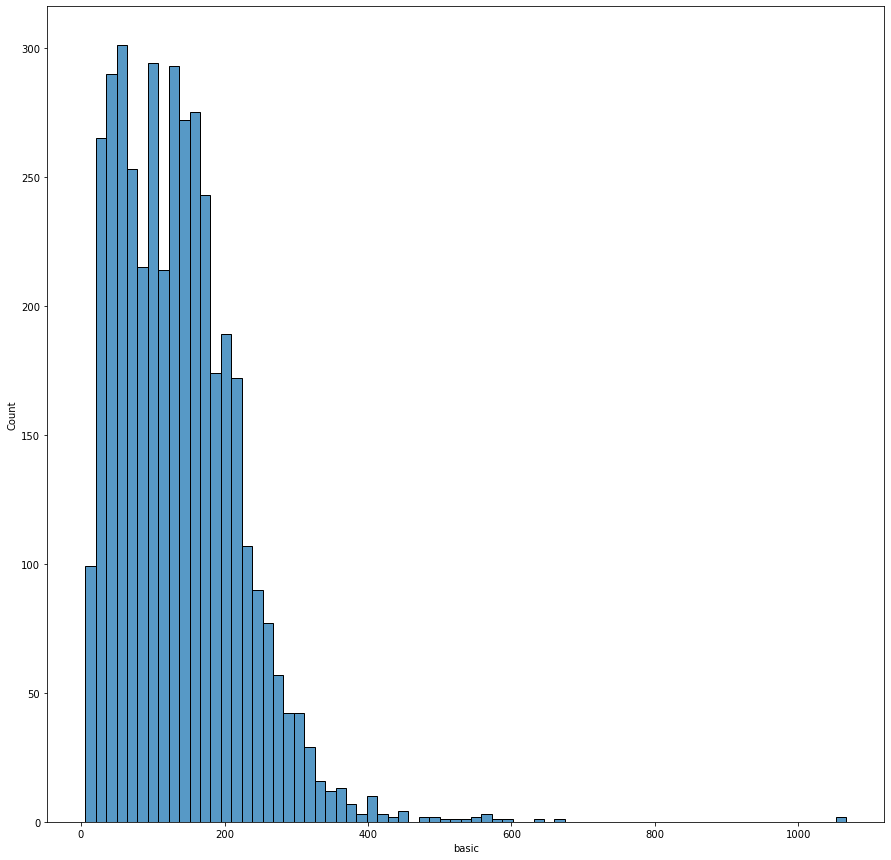

In [7]:
sns.histplot(df['basic']);

In [8]:
stats.shapiro(df["basic"])

ShapiroResult(statistic=0.9131569862365723, pvalue=2.1159606811304738e-43)

In [10]:
df['basic_boxcox'], lambda_ajustada = stats.boxcox(df['basic'])

In [12]:
stats.shapiro(df["basic_boxcox"])

ShapiroResult(statistic=0.9894291162490845, pvalue=6.522045167761746e-17)

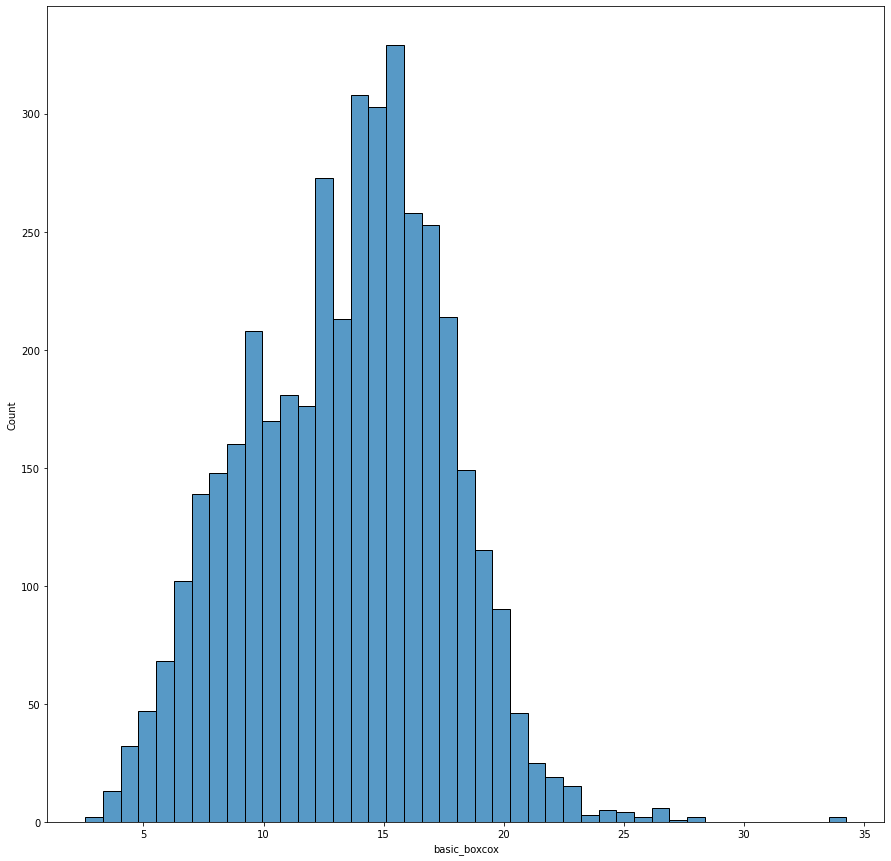

In [14]:
sns.histplot(df['basic_boxcox']);

In [15]:
lambda_ajustada

0.3779432231984016

- Nuestra variable dependiente no puede normalizarse.

### Probamos a normalizar otra variable como práctica

In [16]:
df_num = df.select_dtypes(include = np.number)

In [17]:
for col in df_num.columns:
    if stats.shapiro(df[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(df_num[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(df_num[col])[1]}')
    print('--------------------------------------------------------')

mcdonalds, NO tiene distribución normal -> 3.3051341183991146e-29
--------------------------------------------------------
cappuccino, NO tiene distribución normal -> 9.230846054182422e-30
--------------------------------------------------------
milk, NO tiene distribución normal -> 0.0
--------------------------------------------------------
rice, NO tiene distribución normal -> 0.0
--------------------------------------------------------
eggs, NO tiene distribución normal -> 6.635597765125364e-38
--------------------------------------------------------
chicken, NO tiene distribución normal -> 0.0
--------------------------------------------------------
beef, NO tiene distribución normal -> 0.0
--------------------------------------------------------
banana, NO tiene distribución normal -> 0.0
--------------------------------------------------------
water, NO tiene distribución normal -> 0.0
--------------------------------------------------------
wine, NO tiene distribución normal ->

2- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings